In this notebook I will try to implement and analyze LDA algorithm using PyMC package. The implementation is replication of the code provided at: http://stats.stackexchange.com/questions/104771/latent-dirichlet-allocation-in-pymc

The LDA model is described below:
![LDA Model](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Latent_Dirichlet_allocation.svg/250px-Latent_Dirichlet_allocation.svg.png)

In [10]:
import numpy as np
import pymc as pm
#K, V, D = 2, 4, 3 # number of topics, words, documents
import matplotlib.pyplot as plt
# import seaborn as sns
sns.set_context("poster")
%matplotlib inline

NameError: name 'sns' is not defined

In [12]:
K, V, D = 2, 10, 20 # number of topics, words, documents

data = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 1, 0], [2, 3], [2, 3, 3], [2, 3, 3, 2]])

# data_temp = np.random.randint(0,10,size=(D,V))

In [15]:
lda = LDA(data, topics=2, vocab=3)
lda.fit()

 [-----------------100%-----------------] 1000 of 1000 complete in 0.6 sec

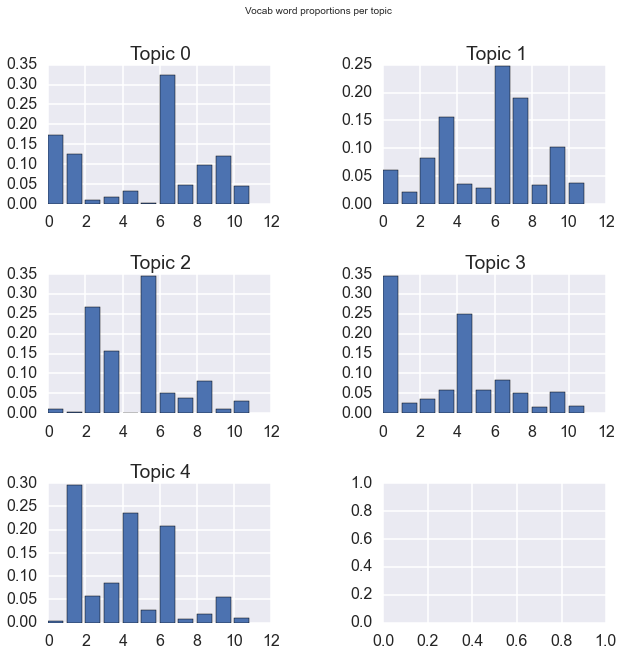

In [5]:
lda.plot_word_dist()

In [6]:
kld_sorted = lda.sorted_docs_sim()
kld_sorted[:10]

[(11, 12, 0.12794402850656339, 0.91550703216514051),
 (12, 11, 0.23233086565032021, 0.91550703216514051),
 (7, 16, 0.069081961101030681, 0.91529433139300531),
 (16, 7, 0.084241263235092026, 0.91529433139300531),
 (11, 14, 0.11389710569477, 0.89897158850740189),
 (14, 11, 0.11807633003998763, 0.89897158850740189),
 (0, 15, 0.27583826339271433, 0.89552039314012999),
 (15, 0, 0.22658878049302303, 0.89552039314012999),
 (8, 16, 0.20735934380211171, 0.88181818181818183),
 (16, 8, 0.28884846182266505, 0.88181818181818183)]

# REAL DATA
Now lets move to trying on some real world data. I will use the reuters corpus.

In [7]:
from nltk.corpus import inaugural
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

In [8]:
# Create a vocabulary from the corpus
vocab = dict()
for fileid in inaugural.fileids():
    for word in inaugural.words(fileid):
        word = word.lower()
        if word not in stops and word.isalpha():
            if word not in vocab:
                vocab[word] = 0
            vocab[word] += 1

In [12]:
"""
Sort the vocab keep only words which occur more than 50 times
Then Create word to id and id to word dictionaries
"""
vocab_sorted = filter(lambda x: x[1] > 50, sorted(vocab.items(), key=lambda x: x[1], reverse=True))
wordids = {v[0]: i for i, v in enumerate(vocab_sorted)}
idwords = {i: v[0] for i, v in enumerate(vocab_sorted)}
vocab_size = len(wordids)
print vocab_size

191


In [13]:
# Generate corpus document vectors
data = []
for fileid in inaugural.fileids():
    data.append([0]*vocab_size)
    for word in inaugural.words(fileid):
        word = word.lower()
        if word in wordids:
            data[-1][wordids[word]] += 1

len(data)

56

[8, 4, 1, 0, 3, 6, 3, 1, 2, 3]


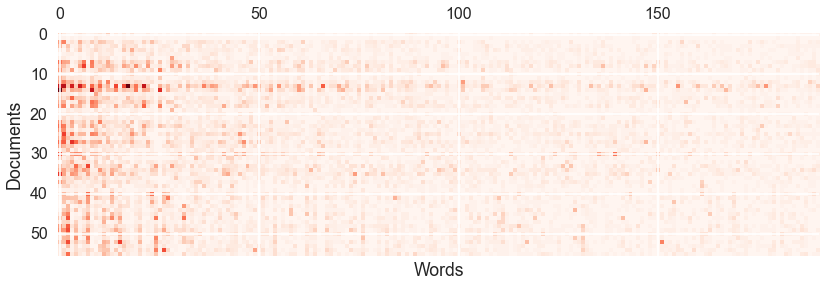

In [14]:
# Plot the document word matrix
print data[0][:10]
data = np.array(data)
plt.clf()
plt.matshow(data, fignum=1000, cmap=plt.cm.Reds)
plt.gca().set_aspect('auto')
plt.xlabel("Words")
plt.ylabel("Documents")

In [15]:
inaugural_lda = LDA(data, topics=10, vocab=vocab_size)

 [-----------------100%-----------------] 1001 of 1000 complete in 756.2 sec

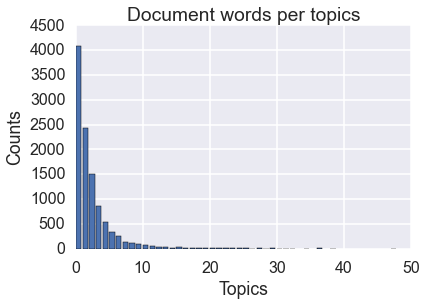

In [16]:
inaugural_lda.fit()
inaugural_lda.plot_words_per_topic()

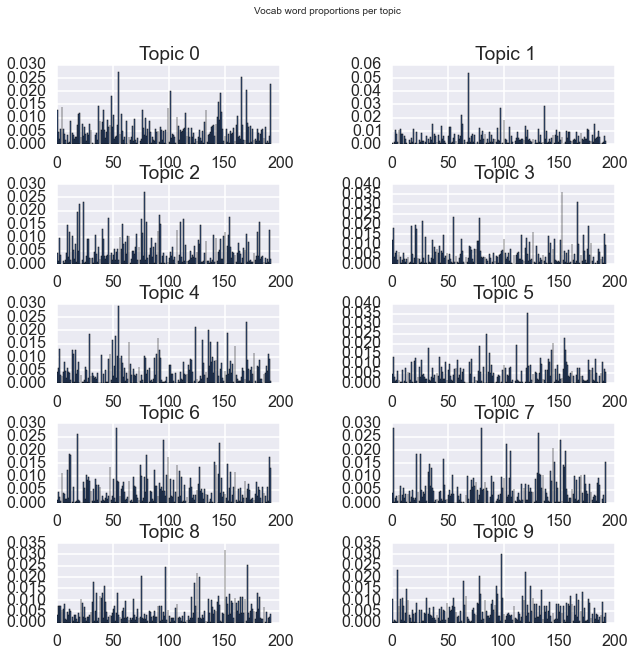

In [17]:
inaugural_lda.plot_word_dist()

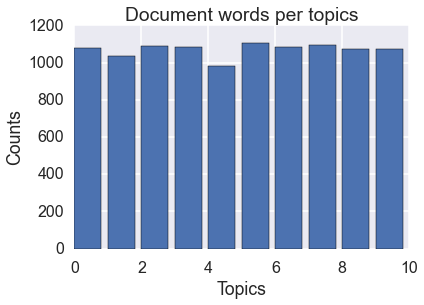

In [29]:
# Above diagram is wrong for Document words per topics

plt.clf()
fig, ax = plt.subplots(1,1)
words = inaugural_lda.Z.value
topic_dist = dict()
for k_i in words:
    for k in k_i:
        if k not in topic_dist:
            topic_dist[k] = 0
        topic_dist[k] += 1
ax.bar(topic_dist.keys(), topic_dist.values())
ax.set_xlabel("Topics")
ax.set_ylabel("Counts")
ax.set_title("Document words per topics")
plt.show()


In [41]:
for i, t in enumerate(inaugural_lda.phi.value):
    print "Topic %i : " % i, ", ".join(idwords[w_] for w_ in np.argsort(t[0])[-10:] if w_ < vocab_size -1)

Topic 0 :  must, without, subject, best, true, institutions, help, beyond, state
Topic 1 :  make, home, much, strong, spirit, interest, know, high, commerce, long
Topic 2 :  future, federal, duties, congress, seek, purpose, public, time, nations, administration
Topic 3 :  united, people, authority, power, constitution, free, administration, state, become, trust
Topic 4 :  whose, liberty, service, right, national, trust, proper, secure, help, state
Topic 5 :  far, character, security, fellow, administration, together, subject, seek, faith, things
Topic 6 :  responsibility, old, future, every, nation, called, party, public, interests
Topic 7 :  united, union, character, general, subject, always, century, americans, future, people
Topic 8 :  live, justice, might, fellow, action, duties, give, high, done, ought
Topic 9 :  done, full, peace, secure, president, god, administration, home, may, way
